# Tutorial 7 

## Question 1

In [130]:
import math
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split

### Question 1 for practice

In [51]:
def EntropyH(x):
    '''
    Calculate entropy but require users to give all the counts of different categories
    :param x: 
    :return: 
    '''
    N = len(x)
    summation = 0
    for i in range(N):
        summation += x[i]
    res = 0
    for i in range(N):
        if (x[i]==0):
            continue
        res += (-x[i]/summation) * math.log(x[i]/summation)
    return res
    
def remainder(*list):
    '''
    this list is the different categories and their sub categories
    the key should be the count of the decision tree feature and the value should be the input of EntropyH function
    :param dict: 
    :return: 
    '''
    N = len(list)
    summation = 0
    newList = []
    for i in range(N):
        summation+=list[i][0]
        newList.append(list[i][1:])
    res = 0
    for i in range(N):
        res += math.fabs(list[i][0]/summation) * EntropyH(newList[i])
    return res


In [52]:
# (a) First round
incomeDict = [  [6,3,3], [4,1,3], [2,1,1]  ]
creditDict = [  [3,0,3], [6,2,4], [3,0,3]  ]
debtDict = [  [8,3,5], [4,2,2]   ]
originalDict = [5,7]
print("original value of entropy: " + str(EntropyH(originalDict)))
print("income feature reduction: " + str(EntropyH(originalDict)-remainder([6,3,3], [4,1,3], [2,1,1])))
print("credit feature reduction: " + str(EntropyH(originalDict)-remainder([3,0,3], [6,2,4], [3,0,3])))
print("debt feature reduction: " + str(EntropyH(originalDict)-remainder([8,3,5], [4,2,2])))
print("As such, in first round, we choose credit feature")



original value of entropy: 0.6791932659915256
income feature reduction: 0.029650097411959342
credit feature reduction: 0.36093618184411924
debt feature reduction: 0.007102047032889192
As such, in first round, we choose credit feature


In [53]:
# (a) second round
originalEntropy = remainder([3,0,3], [6,2,4], [3,0,3])
incomeSecond = [  [1,1,0], [1,1,0], [1,1,0], [1,1,0], [1,1,0], [1,1,0], [4,2,2], [2,2,0]  ]
debtSecond = [  [2,2,0],[1,1,0],[2,2,0],[1,1,0],[2,1,1],[4,1,3]  ]
print("income feature reduction: " + str(originalEntropy-remainder([1,1,0], [1,1,0], [1,1,0], [1,1,0], [1,1,0], [1,1,0], [4,2,2], [2,2,0])))
print("debt feature reduction: " + str(originalEntropy-remainder([2,2,0],[1,1,0],[2,2,0],[1,1,0],[2,1,1],[4,1,3])))
print("As such in second round, we choose debt feature")
print("In the last round, we choose income feature")

income feature reduction: 0.08720802396075797
debt feature reduction: 0.015287505847812743
As such in second round, we choose debt feature
In the last round, we choose income feature


#### !!!The above method is wrong, as we should give different features to different subtrees!!!
* The final answer (tree) is to get a deterministic tree to make decision
* If can stop first, don't need to choose features again and make subtrees


## Question 3

In [90]:
# loads and classify the data and label training sets
data, label = datasets.load_iris(return_X_y=True)
zeroData, zeroLabel = data[0:50,:], label[0:50]
oneData, oneLabel = data[50:100,:], label[50:100]
twoData, twoLabel = data[100:150,:], label[100:150]

#splits all three of them into training set and testing set for validation
zeroTrainData, zeroTestData, zeroTrainLabel, zeroTestLabel = \
    train_test_split(zeroData, zeroLabel, random_state=42, test_size=0.2)
oneTrainData, oneTestData, oneTrainLabel, oneTestLabel = \
    train_test_split(oneData, oneLabel, random_state=42, test_size=0.2)
twoTrainData, twoTestData, twoTrainLabel, twoTestLabel = \
    train_test_split(twoData, twoLabel, random_state=42, test_size=0.2)

In [110]:
# Combine data sets for different classification
zeroOneTrainData = np.vstack((zeroTrainData, oneTrainData))
zeroOneTrainLabel = np.concatenate((zeroTrainLabel, oneTrainLabel))
zeroOneTestData = np.vstack((zeroTestData, oneTestData))
zeroOneTestLabel = np.concatenate((zeroTestLabel, oneTestLabel))

In [112]:
clf = tree.DecisionTreeClassifier()
clf.fit(zeroOneTrainData, zeroOneTrainLabel)
clf.score(zeroOneTestData, zeroOneTestLabel)



1.0

In [119]:
# Take the first two factors for classification
extractedData, extractedLabel = data[:,0:2], label[:]
X = extractedData
y = extractedLabel




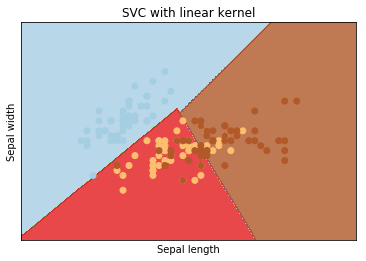

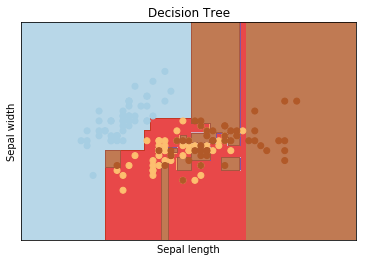

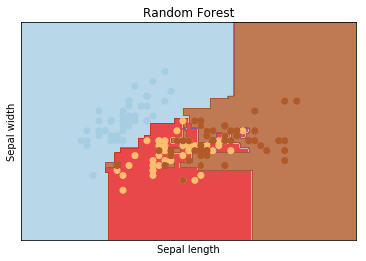

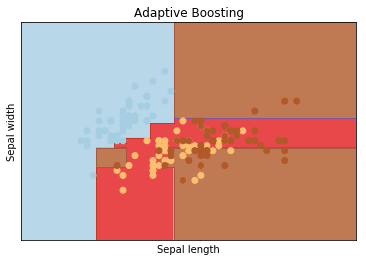

In [133]:
# Plot the decision boundaries
h = .01  # step size in the mesh

svc = svm.SVC(kernel='linear', C=1).fit(X, y)
decisionTree = tree.DecisionTreeClassifier().fit(X, y)
randomForest = RandomForestClassifier().fit(X, y)
adaBoost = AdaBoostClassifier().fit(X, y) 


# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'Decision Tree',
          'Random Forest',
          'Adaptive Boosting']


for i, clf in enumerate((svc, decisionTree, randomForest, adaBoost)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    #plt.subplot(2, 2, i + 1)
    #plt.subplots_adjust(wspace=1, hspace=1)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In [57]:
print(datasets.load_iris()['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  